In [1]:
!pip install hmmlearn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.0 MB/s eta 0:00:00


In [16]:
  from hmmlearn import hmm
  import numpy as np
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt
  import pandas as pd

In [7]:
np.random.seed(123)

In [5]:
states = ['Rainy' , "Sunny" , "Cloudy" , "Snowy"]
obs = ['Wet' , 'Dry' , 'Frozen']
ns = len(states)
no = len(obs)

In [33]:
transition_prob = np.array([[0.6, 0.0, 0.1, 0.3],  # Rainy
                            [0.0, 0.7, 0.3, 0.0],  # Sunny
                            [0.2, 0.4, 0.2, 0.2],  # Cloudy
                            [0.4, 0.0, 0.1, 0.5]]) # Snowy

# Emission Probability Matrix (from state i to observation j)
emission_prob = np.array([[0.8, 0.1, 0.1],  # Rainy
                          [0.2, 0.8, 0.0],  # Sunny
                          [0.2, 0.6, 0.2],  # Cloudy
                          [0.1, 0.3, 0.6]]) # Snowy

# Initial State Probabilities (uniform for this example)
initial_prob = np.array([0.25, 0.25, 0.25, 0.25])

In [34]:
hmmodel = hmm.CategoricalHMM(n_components=4  , n_iter=1000 , tol=0.01)
hmmodel.startprob_ = initial_prob
hmmodel.transmat_ = transition_prob
hmmodel.emissionprob_ = emission_prob

In [35]:
X,y = hmmodel.sample(100)
X_train , X_test , y_train , y_test = train_test_split(X, y , random_state = 42 , test_size = 0.25)

In [36]:
hmmodel.fit(X_train)
predicted_states = hmmodel.predict(X_test)
accuracy = accuracy_score(y_test, predicted_states)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 36.00%


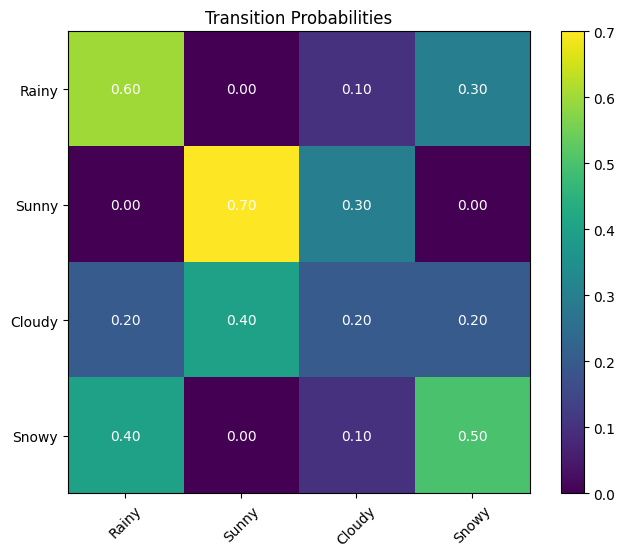

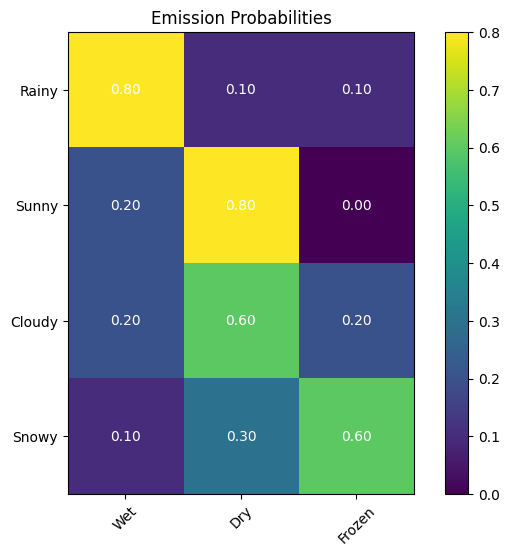

In [37]:
# prompt: plot hte graphs f or transmimssion probabilties which are hidden

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'transition_prob' and 'emission_prob' are defined as in the provided code.

# Plot transition probabilities
plt.figure(figsize=(8, 6))
plt.imshow(transition_prob, cmap='viridis', interpolation='nearest')
plt.title('Transition Probabilities')
plt.colorbar()
plt.xticks(np.arange(len(states)), states, rotation=45)
plt.yticks(np.arange(len(states)), states)

for i in range(len(states)):
    for j in range(len(states)):
        plt.text(j, i, f'{transition_prob[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

# Plot emission probabilities
plt.figure(figsize=(8, 6))
plt.imshow(emission_prob, cmap='viridis', interpolation='nearest')
plt.title('Emission Probabilities')
plt.colorbar()
plt.xticks(np.arange(len(obs)), obs, rotation=45)
plt.yticks(np.arange(len(states)), states)

for i in range(len(states)):
    for j in range(len(obs)):
        plt.text(j, i, f'{emission_prob[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()
